In [56]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [57]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [58]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [59]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [60]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [61]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [62]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

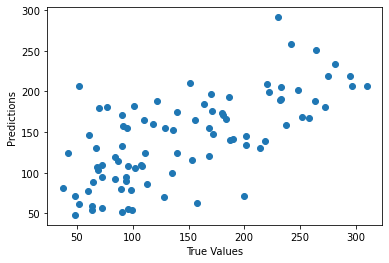

In [63]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [64]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [107]:
y = data['Value']

In [108]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [109]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### MinMaxScaler

In [111]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [112]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [114]:
X_train

,Age,Overall,Potential,Jersey Number
0,0.60,0.437500,0.404255,0.173469
1,0.44,0.395833,0.361702,0.132653
2,0.60,0.520833,0.489362,0.132653
3,0.20,0.354167,0.553191,0.295918
4,0.40,0.625000,0.595745,0.051020
...,...,...,...,...
14320,0.24,0.666667,0.744681,0.010204
14321,0.24,0.333333,0.468085,0.397959
14322,0.28,0.208333,0.297872,0.234694
14323,0.48,0.187500,0.148936,0.010204


In [95]:
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [96]:
X_test

,Age,Overall,Potential,Jersey Number
0,0.448276,0.437500,0.404255,0.234694
1,0.103448,0.229167,0.531915,0.020408
2,0.586207,0.500000,0.468085,0.030612
3,0.103448,0.354167,0.595745,0.183673
4,0.517241,0.708333,0.680851,0.051020
...,...,...,...,...
3577,0.241379,0.333333,0.446809,0.255102
3578,0.344828,0.479167,0.446809,0.081633
3579,0.172414,0.458333,0.659574,0.153061
3580,0.586207,0.354167,0.319149,0.214286


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [115]:
import numpy as np
from scipy import sparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array


class MyMinMaxScaler:
    """Transform features by scaling each feature to a given range.
    This estimator scales and translates each feature individually such
    that it is in the given range on the training set, i.e. between
    zero and one.
    The transformation is given by (when ``axis=0``)::
        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        X_scaled = X_std * (max - min) + min
    where min, max = feature_range.
    The transformation is calculated as (when ``axis=0``)::
       X_scaled = scale * X + min - X.min(axis=0) * scale
       where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
    This transformation is often used as an alternative to zero mean,
    unit variance scaling."""
    
    
    def __init__(self, feature_range=(0, 1), copy=True):
        self.feature_range = feature_range
        self.copy = copy

    def fit(self, X, y=None):
        X = check_array(X, copy=self.copy, ensure_2d=True,
                        accept_sparse="csc", dtype=np.float32,
                        ensure_min_samples=2)

        feature_range = self.feature_range
    
        if sparse.issparse(X):
            data_min = []
            data_max = []
            data_range = []
            for i in range(X.shape[1]):
                if X.indptr[i] == X.indptr[i+1]:
                    data_min.append(0)
                    data_max.append(0)
                    data_range.append(0)
                else:
                    data_min.append(X.data[X.indptr[i]:X.indptr[i + 1]].min())
                    data_max.append(X.data[X.indptr[i]:X.indptr[i + 1]].max())
            data_min = np.array(data_min, dtype=np.float32)
            data_max = np.array(data_max, dtype=np.float32)
            data_range = data_max - data_min

        else:
            data_min = np.min(X, axis=0)
            data_range = np.max(X, axis=0) - data_min

        # Do not scale constant features
        if isinstance(data_range, np.ndarray):
            # For a sparse matrix, constant features will be set to one!
            if sparse.issparse(X):
                for i in range(len(data_min)):
                    if data_range[i] == 0.0:
                        data_min[i] = data_min[i] - 1
            data_range[data_range == 0.0] = 1.0
        elif data_range == 0.:
            data_range = 1.

        self.scale_ = (feature_range[1] - feature_range[0]) / data_range
        self.min_ = feature_range[0] - data_min * self.scale_
        self.data_range = data_range
        self.data_min = data_min
        return self
        
        
    def transform(self, X):
        check_is_fitted(self, 'scale_')
        X = check_array(X, accept_sparse="csc", copy=self.copy)

        if sparse.issparse(X):
            for i in range(X.shape[1]):
                X.data[X.indptr[i]:X.indptr[i + 1]] *= self.scale_[i]
                X.data[X.indptr[i]:X.indptr[i + 1]] += self.min_[i]
        else:
            X *= self.scale_
            X += self.min_
        return X

In [119]:
# TODO
# Initialise the Scaler and Fit
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
norm = MyMinMaxScaler().fit(X_train)
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,Age,Overall,Potential,Jersey Number
0,0.172414,0.375000,0.521739,0.010204
1,0.034483,0.229167,0.565217,0.295918
2,0.655172,0.416667,0.391304,0.316327
3,0.241379,0.270833,0.391304,0.387755
4,0.137931,0.312500,0.543478,0.306122
...,...,...,...,...
14320,0.275862,0.354167,0.478261,0.173469
14321,0.137931,0.541667,0.782609,0.265306
14322,0.206897,0.354167,0.521739,0.183673
14323,0.172414,0.166667,0.326087,0.255102


### Standard Scaler

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [122]:
X_train  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

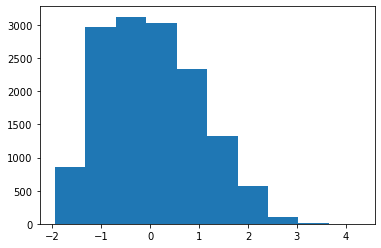

In [123]:
plt.hist(X_train.Age)
plt.show()

In [124]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,172.330659,460.234137,496.962139,54.179435
1,141.209439,425.671142,504.436041,17.281526
2,172.330659,508.622330,549.279454,29.580829
3,128.760951,474.059335,564.227258,11.131875
4,110.088219,460.234137,616.544573,177.172466
...,...,...,...,...
3577,122.536707,377.282948,511.909943,177.172466
3578,159.882171,494.797132,541.805552,183.322117
3579,166.106415,529.360127,571.701160,41.880132
3580,172.330659,543.185325,594.122867,140.274556


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [177]:
import numpy as np
from scipy import sparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.utils.sparsefuncs import inplace_column_scale, \
    mean_variance_axis


def _mean_and_std(X, axis=0, with_mean=True, with_std=True):
    """Compute mean and std deviation for centering, scaling.
    Zero valued std components are reset to 1.0 to avoid NaNs when scaling.
    """
    X = np.asarray(X)
    Xr = np.rollaxis(X, axis)

    if with_mean:
        mean_ = Xr.mean(axis=0)
    else:
        mean_ = None

    if with_std:
        std_ = Xr.std(axis=0)
        if isinstance(std_, np.ndarray):
            std_[std_ == 0.] = 1.0
        elif std_ == 0.:
            std_ = 1.
    else:
        std_ = None

    return mean_, std_


class StandardScaler(BaseEstimator, TransformerMixin):
    """Standardize features by removing the mean and scaling to unit variance
    Centering and scaling happen independently on each feature by computing
    the relevant statistics on the samples in the training set. Mean and
    standard deviation are then stored to be used on later data using the
    `transform` method.
    Standardization of a dataset is a common requirement for many
    machine learning estimators: they might behave badly if the
    individual feature do not more or less look like standard normally
    distributed data (e.g. Gaussian with 0 mean and unit variance).
    For instance many elements used in the objective function of
    a learning algorithm (such as the RBF kernel of Support Vector
    Machines or the L1 and L2 regularizers of linear models) assume that
    all features are centered around 0 and have variance in the same
    order. If a feature has a variance that is orders of magnitude larger
    that others, it might dominate the objective function and make the
    estimator unable to learn from other features correctly as expected.
    Parameters
    ----------
    with_mean : boolean, True by default
        If True, center the data before scaling.
        This does not work (and will raise an exception) when attempted on
        sparse matrices, because centering them entails building a dense
        matrix which in common use cases is likely to be too large to fit in
        memory.
    with_std : boolean, True by default
        If True, scale the data to unit variance (or equivalently,
        unit standard deviation).
    copy : boolean, optional, default True
        If False, try to avoid a copy and do inplace scaling instead.
        This is not guaranteed to always work inplace; e.g. if the data is
        not a NumPy array or scipy.sparse CSR matrix, a copy may still be
        returned.
    Attributes
    ----------
    mean_ : array of floats with shape [n_features]
        The mean value for each feature in the training set.
    std_ : array of floats with shape [n_features]
        The standard deviation for each feature in the training set.
    See also
    --------
    :func:`sklearn.preprocessing.scale` to perform centering and
    scaling without using the ``Transformer`` object oriented API
    :class:`sklearn.decomposition.RandomizedPCA` with `whiten=True`
    to further remove the linear correlation across features.
    """


    def __init__(self, copy=True, with_mean=True, with_std=True,
                 center_sparse=True):
        self.with_mean = with_mean
        self.with_std = with_std
        self.copy = copy
        self.center_sparse = center_sparse

    def fit(self, X, y=None):
        """Don't trust the documentation of this module!
        Compute the mean and std to be used for later scaling.
        Parameters
        ----------
        X : array-like or CSR matrix with shape [n_samples, n_features]
            The data used to compute the mean and standard deviation
            used for later scaling along the features axis.
        """
        X = check_array(X, copy=self.copy, accept_sparse="csc",
                         ensure_2d=False)

        if sparse.issparse(X):
            if self.center_sparse:
                means = []
                vars = []

                # This only works for csc matrices...
                for i in range(X.shape[1]):
                    if X.indptr[i] == X.indptr[i + 1]:
                        means.append(0)
                        vars.append(1)
                    else:
                        vars.append(
                            X.data[X.indptr[i]:X.indptr[i + 1]].var())
                        # If the variance is 0, set all occurences of this
                        # features to 1
                        means.append(
                            X.data[X.indptr[i]:X.indptr[i + 1]].mean())
                        if 0.0000001 >= vars[-1] >= -0.0000001:
                            means[-1] -= 1

                self.std_ = np.sqrt(np.array(vars))
                self.std_[np.array(vars) == 0.0] = 1.0
                self.mean_ = np.array(means)

                return self
            elif self.with_mean:
                raise ValueError(
                    "Cannot center sparse matrices: pass `with_mean=False` "
                    "instead. See docstring for motivation and alternatives.")
            else:
                self.mean_ = None

            if self.with_std:
                var = mean_variance_axis(X, axis=0)[1]
                self.std_ = np.sqrt(var)
                self.std_[var == 0.0] = 1.0
            else:
                self.std_ = None
            return self
        else:
            self.mean_, self.std_ = _mean_and_std(
                X, axis=0, with_mean=self.with_mean, with_std=self.with_std)
            return self

    def transform(self, X, y=None, copy=None):
        """Perform standardization by centering and scaling
        Parameters
        ----------
        X : array-like with shape [n_samples, n_features]
            The data used to scale along the features axis.
        """
        check_is_fitted(self, 'std_')

        copy = copy if copy is not None else self.copy
        X = check_array(X, copy=copy, accept_sparse="csc", ensure_2d=False)

        if sparse.issparse(X):
            if self.center_sparse:
                for i in range(X.shape[1]):
                    X.data[X.indptr[i]:X.indptr[i + 1]] -= self.mean_[i]

            elif self.with_mean:
                raise ValueError(
                    "Cannot center sparse matrices: pass `with_mean=False` "
                    "instead. See docstring for motivation and alternatives.")

            else:
                pass

            if self.std_ is not None:
                inplace_column_scale(X, 1 / self.std_)
        else:
            if self.with_mean:
                X -= self.mean_
            if self.with_std:
                X /= self.std_
        return X


    def inverse_transform(self, X, copy=None):
        """Scale back the data to the original representation
        Parameters
        ----------
        X : array-like with shape [n_samples, n_features]
            The data used to scale along the features axis.
        """
        check_is_fitted(self, 'std_')

        copy = copy if copy is not None else self.copy
        if sparse.issparse(X):
            if self.with_mean:
                raise ValueError(
                    "Cannot uncenter sparse matrices: pass `with_mean=False` "
                    "instead See docstring for motivation and alternatives.")
            if not sparse.isspmatrix_csr(X):
                X = X.tocsr()
                copy = False
            if copy:
                X = X.copy()
            if self.std_ is not None:
                inplace_column_scale(X, self.std_)
        else:
            X = np.asarray(X)
            if copy:
                X = X.copy()
            if self.with_std:
                X *= self.std_
            if self.with_mean:
                X += self.mean_
        return X

In [178]:
# TODO

# tasks

###### try applying this scalers to any dataset and check the regression results

In [179]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [181]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [182]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [183]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [184]:
model.score(X_test, y_test)

0.45260660216173787

In [185]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [186]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [187]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [188]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,1.498365,1.061370,0.219902,1.138877,0.728473,1.055893,-0.824451,0.711038,0.547560,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710597,-0.424929,0.272425,-1.529791,1.484286,-0.019776,0.367236
2,0.085182,-0.942179,1.018987,1.992480,-0.309589,-0.326699,-0.119111,-0.062210,0.331260,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639464,-1.174640,-1.215508,0.664600,-0.835458,-1.069599,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706468,-0.799784,-1.110167,1.291569,-1.608706,-0.802848,-0.918820
...,...,...,...,...,...,...,...,...,...,...
348,-2.113102,-0.942179,-1.652240,-0.923998,-0.943960,-0.715141,0.194374,-0.835458,-1.270691,-1.776191
349,0.085182,1.061370,0.608029,1.707946,-0.770949,-0.978492,0.351116,-0.835458,0.155448,0.281499
350,0.634754,-0.942179,-0.465028,-0.141528,-0.078908,-0.603217,1.683425,-0.835458,-0.253776,-0.061449
351,-0.307368,-0.942179,-0.533521,-0.852865,-0.338424,0.114414,-0.354224,-0.062210,-0.830712,-0.833083


In [189]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [190]:
model.score(X_test, y_test)

0.45260660216173787

In [191]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [192]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [193]:
model.score(X_test, y_test)

-231.9688222115085

In [194]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 1110.992426954278
Train RMSE: 53.55881425327268


In [195]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [197]:
norm = StandardScaler().fit(X_train)

In [198]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [199]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [200]:
model.score(X_test, y_test)

0.4499045750576577

In [201]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979
